In [1]:
###1.Import Packages & Data:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#For Hypothesis Testing
import scipy.stats as stats

#For Statistical Model
import statsmodels.formula.api as smf

#For Linear Regression Model
from sklearn.linear_model import LinearRegression

#importing for model accuracy measures from sklearn
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error


#importing train_test_split for training & testing of model
from sklearn.model_selection import train_test_split

In [2]:
car_sales = pd.read_csv(r"C:\Users\Pratiksha Sahu\Downloads\Car_sales - 1715413211292.csv")
car_sales.head()

,Manufacturer,Model,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


###2.Understanding the business problem:
* Extracting the important features & predicting the new car sales(continuous).Hence the technique will be regression.

###3.EDA

In [3]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Manufacturer            157 non-null    object 
 1   Model                   157 non-null    object 
 2   Sales_in_thousands      157 non-null    float64
 3   four_year_resale_value  121 non-null    float64
 4   Vehicle_type            157 non-null    object 
 5   Price_in_thousands      155 non-null    float64
 6   Engine_size             156 non-null    float64
 7   Horsepower              156 non-null    float64
 8   Wheelbase               156 non-null    float64
 9   Width                   156 non-null    float64
 10  Length                  156 non-null    float64
 11  Curb_weight             155 non-null    float64
 12  Fuel_capacity           156 non-null    float64
 13  Fuel_efficiency         154 non-null    float64
 14  Latest_Launch           157 non-null    ob

*Dividing the data into CONTINUOUS & CATEGORICAL TYPES:

In [4]:
#Method 1: Dividing the data but also creating the copy of the sub-data:
#This method is used when the dataset is small.
car_numeric = car_sales.select_dtypes('float64')
car_object = car_sales.select_dtypes('object')

In [5]:
#Method 2: Fetching the column names of the continuous & categorical data.
#This method will fetch only the column names but not the actual data
cars_conti = car_sales.select_dtypes('float64').columns
cars_categ = car_sales.select_dtypes('object').columns 

###Since the dataset is small we are using Method 1:

###4. Get the UDF that treats the missing values & outliers for continuous variables:

In [6]:
#Detecting misisng values & outliers
def continuous_var_summary(x):      #Function Definition
    #freq & missings:
    n_total = x.shape[0] #number of rows
    n_miss = x.isna().sum() #count of misisng values in each columns
    prec_miss = n_miss * 100/n_total #%age of missing values

    #Outliers - iqr
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    lc_iqr = q1 - 1.5 * iqr
    uc_iqr = q3 + 1.5 * iqr

    return pd.Series([x.dtype,x.nunique(),n_total,x.count(),n_miss,prec_miss,
                      x.sum(),x.mean(),x.std(),x.var(),
                      lc_iqr,uc_iqr,
                      x.min(),x.quantile(0.01),x.quantile(0.05),x.quantile(0.10),
                      x.quantile(0.25),x.quantile(0.50),x.quantile(0.75),
                      x.quantile(0.90),x.quantile(0.95),x.quantile(0.99),x.max()],

                     index = ['dtypes','cardinality','n_tot','n', #n = Number of unique values 
                              'nmiss','perc_miss',
                              'sum','mean','std','var',
                              'lc_iqr','uc_iqr',
                              'min','p1','p5','p10','p25','p50','p75','p90','p95','p99','max']) 

In [7]:
summ1 = car_numeric.apply(continuous_var_summary)  #Function Calling
summ1

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
dtypes,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
cardinality,157,117,152,31,66,88,78,127,147,55,20,154
n_tot,157,157,157,157,157,157,157,157,157,157,157,157
n,157,121,155,156,156,156,156,156,155,156,154,155
nmiss,0,36,2,1,1,1,1,1,2,1,3,2
perc_miss,0.0,22.929936,1.273885,0.636943,0.636943,0.636943,0.636943,0.636943,1.273885,0.636943,1.910828,1.273885
sum,8320.698,2186.83,4245.567,477.5,29008.0,16768.0,11099.4,29225.6,523.594,2800.5,3672.0,11941.756636
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.15,187.34359,3.378026,17.951923,23.844156,77.043591
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
var,4628.002257,131.180007,205.969949,1.0913,3214.926385,58.389512,11.915419,180.412023,0.397532,15.115932,18.341567,632.153558


###5.Treating the missing values & outliers(%tile method):

In [8]:
### treating outliers using .clip(lower= ,upper= )
car_numeric= car_numeric.apply(lambda x: x.clip(lower = x.quantile(0.01), upper=x.quantile(0.99)))
car_numeric

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,16.919,16.360,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,39.384,19.875,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
2,14.114,18.225,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,NaN
3,8.588,29.725,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,20.397,22.255,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...
152,3.545,NaN,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,66.498812
153,15.245,NaN,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,70.654495
154,17.531,NaN,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,71.155978
155,3.493,NaN,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,101.623357


In [9]:
summ1 = car_numeric.apply(continuous_var_summary)  
summ1

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
dtypes,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
cardinality,155,115,150,29,64,87,76,125,145,54,19,152
n_tot,157,157,157,157,157,157,157,157,157,157,157,157
n,157,121,155,156,156,156,156,156,155,156,154,155
nmiss,0,36,2,1,1,1,1,1,2,1,3,2
perc_miss,0.0,22.929936,1.273885,0.636943,0.636943,0.636943,0.636943,0.636943,1.273885,0.636943,1.910828,1.273885
sum,8025.5292,2180.421,4235.95548,475.81,28910.3,16760.1,11102.45,29223.94,523.77016,2799.9,3660.0,11911.685368
mean,51.11802,18.020008,27.328745,3.050064,185.322436,107.436538,71.169551,187.332949,3.379162,17.948077,23.766234,76.849583
std,57.722699,11.181335,14.06397,0.982279,52.81647,7.424295,3.390339,13.12035,0.621764,3.819854,3.994755,23.844968
var,3331.909938,125.02226,197.795238,0.964871,2789.579526,55.120156,11.4944,172.143594,0.386591,14.591287,15.958068,568.58248


In [10]:
car_numeric = car_numeric.apply(lambda x: x.fillna(x.mean()))
car_numeric

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,16.919,16.360000,21.500000,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,39.384,19.875000,28.400000,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
2,14.114,18.225000,27.328745,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,76.849583
3,8.588,29.725000,42.000000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,20.397,22.255000,23.990000,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...
152,3.545,18.020008,24.400000,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,66.498812
153,15.245,18.020008,27.500000,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,70.654495
154,17.531,18.020008,28.800000,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,71.155978
155,3.493,18.020008,45.500000,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,101.623357


In [11]:
summ1 = car_numeric.apply(continuous_var_summary)
summ1

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
dtypes,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
cardinality,155,116,151,30,65,88,77,126,146,55,20,153
n_tot,157,157,157,157,157,157,157,157,157,157,157,157
n,157,157,157,157,157,157,157,157,157,157,157,157
nmiss,0,0,0,0,0,0,0,0,0,0,0,0
perc_miss,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sum,8025.5292,2829.141298,4290.61297,478.860064,29095.622436,16867.536538,11173.619551,29411.272949,530.528485,2817.848077,3731.298701,12065.384534
mean,51.11802,18.020008,27.328745,3.050064,185.322436,107.436538,71.169551,187.332949,3.379162,17.948077,23.766234,76.849583
std,57.722699,9.80668,13.973525,0.979125,52.646914,7.400461,3.379455,13.07823,0.617766,3.807591,3.956157,23.691622
var,3331.909938,96.170969,195.259402,0.958686,2771.697606,54.766822,11.420718,171.04011,0.381634,14.497753,15.651182,561.292961


### Linear Regression is based on many assumptions, out of which four assumptions are as follows:
*1.All variables must follow normal distribution. If not X ,then atleast Y should follow normal distribution.
*2.All X variables must be linear to Y variable, else getting the straight line for best fit will not be possible.
*3.The number of observations(rows) > number of variables(columns).
*4. X variables must be independent.

In [14]:
#Distribution of Y variable:

C:\Users\Pratiksha Sahu\AppData\Local\Temp\ipykernel_3908\1529992507.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(car_numeric.Sales_in_thousands)
C:\Users\Pratiksha Sahu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Sales_in_thousands', ylabel='Density'>

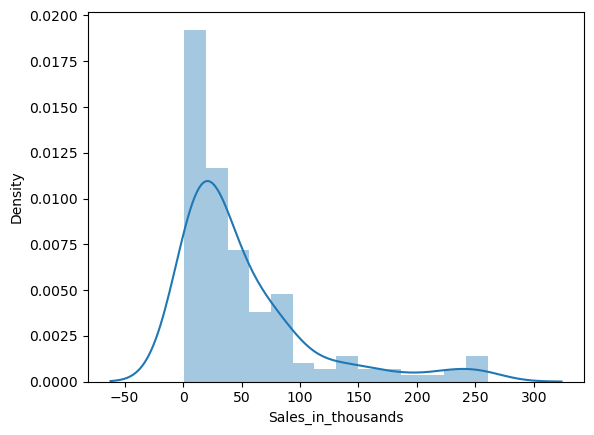

In [12]:
sns.distplot(car_numeric.Sales_in_thousands)

#There is one function from where we can get whether the data is normally distributed or not:

.shew():

In [13]:
car_numeric.Sales_in_thousands.skew()

1.9924932920508793

In [18]:
#Note:- For data to be normally distributed the skew() function must return 0

In [19]:
#For proceeding, we need to make this as 0 or near to zero

In [14]:
ln_Sales_in_thousands = np.log(car_numeric.Sales_in_thousands)

In [15]:
ln_Sales_in_thousands.skew()

-0.5925861100519006

###7.Handling Categorical Data
*It can be done using DUMMY VARIABLES

In [22]:
#Its not possible to take all the categorical variables, hence we need to check the cardinality.

In [16]:
car_object.nunique()

Manufacturer      30
Model            156
Vehicle_type       2
Latest_Launch    130
dtype: int64

In [17]:
car_object.Vehicle_type.value_counts()

Vehicle_type
Passenger    116
Car           41
Name: count, dtype: int64

In [18]:
car_object.Manufacturer.value_counts()

Manufacturer
Dodge         11
Ford          11
Toyota         9
Chevrolet      9
Mercedes-B     9
Mitsubishi     7
Nissan         7
Chrysler       7
Volvo          6
Oldsmobile     6
Lexus          6
Mercury        6
Pontiac        6
Volkswagen     6
Saturn         5
Cadillac       5
Honda          5
Plymouth       4
Acura          4
Buick          4
Audi           3
Jeep           3
Porsche        3
Hyundai        3
BMW            3
Lincoln        3
Saab           2
Subaru         2
Jaguar         1
Infiniti       1
Name: count, dtype: int64

###DUMMY VARIABLES:  
        pd.getdummies()

In [19]:
car_object = pd.get_dummies(car_object.loc[::,['Manufacturer','Vehicle_type']],drop_first=True)
car_object
#drop_first is used to remove the multi-colinearity

,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Buick,Manufacturer_Cadillac,Manufacturer_Chevrolet,Manufacturer_Chrysler,Manufacturer_Dodge,Manufacturer_Ford,Manufacturer_Honda,Manufacturer_Hyundai,...,Manufacturer_Plymouth,Manufacturer_Pontiac,Manufacturer_Porsche,Manufacturer_Saab,Manufacturer_Saturn,Manufacturer_Subaru,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Vehicle_type_Passenger
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
153,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
154,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
155,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True


In [20]:
car_object.columns

Index(['Manufacturer_Audi', 'Manufacturer_BMW', 'Manufacturer_Buick',
       'Manufacturer_Cadillac', 'Manufacturer_Chevrolet',
       'Manufacturer_Chrysler', 'Manufacturer_Dodge', 'Manufacturer_Ford',
       'Manufacturer_Honda', 'Manufacturer_Hyundai', 'Manufacturer_Infiniti',
       'Manufacturer_Jaguar', 'Manufacturer_Jeep', 'Manufacturer_Lexus',
       'Manufacturer_Lincoln', 'Manufacturer_Mercedes-B',
       'Manufacturer_Mercury', 'Manufacturer_Mitsubishi',
       'Manufacturer_Nissan', 'Manufacturer_Oldsmobile',
       'Manufacturer_Plymouth', 'Manufacturer_Pontiac', 'Manufacturer_Porsche',
       'Manufacturer_Saab', 'Manufacturer_Saturn', 'Manufacturer_Subaru',
       'Manufacturer_Toyota', 'Manufacturer_Volkswagen', 'Manufacturer_Volvo',
       'Vehicle_type_Passenger'],
      dtype='object')

In [21]:
car_object = car_object.rename(columns={'Manufacturer_Mercedes-B':'Manufacturer_Mercedes_B'})
car_object.columns

Index(['Manufacturer_Audi', 'Manufacturer_BMW', 'Manufacturer_Buick',
       'Manufacturer_Cadillac', 'Manufacturer_Chevrolet',
       'Manufacturer_Chrysler', 'Manufacturer_Dodge', 'Manufacturer_Ford',
       'Manufacturer_Honda', 'Manufacturer_Hyundai', 'Manufacturer_Infiniti',
       'Manufacturer_Jaguar', 'Manufacturer_Jeep', 'Manufacturer_Lexus',
       'Manufacturer_Lincoln', 'Manufacturer_Mercedes_B',
       'Manufacturer_Mercury', 'Manufacturer_Mitsubishi',
       'Manufacturer_Nissan', 'Manufacturer_Oldsmobile',
       'Manufacturer_Plymouth', 'Manufacturer_Pontiac', 'Manufacturer_Porsche',
       'Manufacturer_Saab', 'Manufacturer_Saturn', 'Manufacturer_Subaru',
       'Manufacturer_Toyota', 'Manufacturer_Volkswagen', 'Manufacturer_Volvo',
       'Vehicle_type_Passenger'],
      dtype='object')

###8.Data Combining:

In [22]:
cars_new = pd.concat([car_object,car_numeric],axis=1)
cars_new

,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Buick,Manufacturer_Cadillac,Manufacturer_Chevrolet,Manufacturer_Chrysler,Manufacturer_Dodge,Manufacturer_Ford,Manufacturer_Honda,Manufacturer_Hyundai,...,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,False,False,False,False,False,False,False,False,False,False,...,21.500000,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,False,False,False,False,False,False,False,False,False,False,...,28.400000,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
2,False,False,False,False,False,False,False,False,False,False,...,27.328745,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,76.849583
3,False,False,False,False,False,False,False,False,False,False,...,42.000000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,True,False,False,False,False,False,False,False,False,False,...,23.990000,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,False,False,False,False,False,False,False,False,False,False,...,24.400000,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,66.498812
153,False,False,False,False,False,False,False,False,False,False,...,27.500000,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,70.654495
154,False,False,False,False,False,False,False,False,False,False,...,28.800000,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,71.155978
155,False,False,False,False,False,False,False,False,False,False,...,45.500000,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,101.623357


###Adding the transformed Sales in cars_new:

In [23]:
cars_new.columns

Index(['Manufacturer_Audi', 'Manufacturer_BMW', 'Manufacturer_Buick',
       'Manufacturer_Cadillac', 'Manufacturer_Chevrolet',
       'Manufacturer_Chrysler', 'Manufacturer_Dodge', 'Manufacturer_Ford',
       'Manufacturer_Honda', 'Manufacturer_Hyundai', 'Manufacturer_Infiniti',
       'Manufacturer_Jaguar', 'Manufacturer_Jeep', 'Manufacturer_Lexus',
       'Manufacturer_Lincoln', 'Manufacturer_Mercedes_B',
       'Manufacturer_Mercury', 'Manufacturer_Mitsubishi',
       'Manufacturer_Nissan', 'Manufacturer_Oldsmobile',
       'Manufacturer_Plymouth', 'Manufacturer_Pontiac', 'Manufacturer_Porsche',
       'Manufacturer_Saab', 'Manufacturer_Saturn', 'Manufacturer_Subaru',
       'Manufacturer_Toyota', 'Manufacturer_Volkswagen', 'Manufacturer_Volvo',
       'Vehicle_type_Passenger', 'Sales_in_thousands',
       'four_year_resale_value', 'Price_in_thousands', 'Engine_size',
       'Horsepower', 'Wheelbase', 'Width', 'Length', 'Curb_weight',
       'Fuel_capacity', 'Fuel_efficiency', 'Pow

In [24]:
cars_new['ln_Sales_in_thousands'] = np.log(car_numeric.Sales_in_thousands)
cars_new

,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Buick,Manufacturer_Cadillac,Manufacturer_Chevrolet,Manufacturer_Chrysler,Manufacturer_Dodge,Manufacturer_Ford,Manufacturer_Honda,Manufacturer_Hyundai,...,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,ln_Sales_in_thousands
0,False,False,False,False,False,False,False,False,False,False,...,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150,2.828437
1,False,False,False,False,False,False,False,False,False,False,...,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778,3.673360
2,False,False,False,False,False,False,False,False,False,False,...,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,76.849583,2.647167
3,False,False,False,False,False,False,False,False,False,False,...,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779,2.150366
4,True,False,False,False,False,False,False,False,False,False,...,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639,3.015388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,False,False,False,False,False,False,False,False,False,False,...,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,66.498812,1.265538
153,False,False,False,False,False,False,False,False,False,False,...,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,70.654495,2.724252
154,False,False,False,False,False,False,False,False,False,False,...,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,71.155978,2.863971
155,False,False,False,False,False,False,False,False,False,False,...,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,101.623357,1.250761


###Check for co-relations between the variables:

<Axes: >

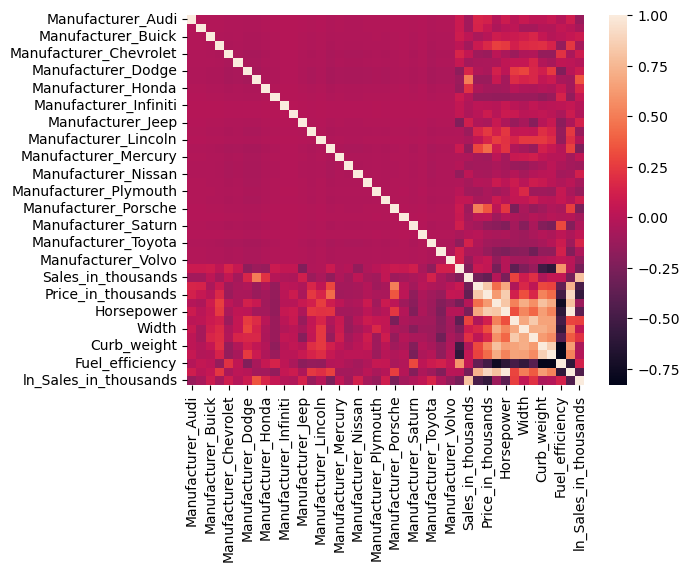

In [25]:
sns.heatmap(cars_new.corr())

###VARIABLE REDUCTIONS:- Variable reduction must be done after data combining & before model building:

a.Feature Selection:
            f_regression:(x,y)
            Every x variable will be compared with y variable
                  returns: 
                       i. f_Score,
                       ii. p-value
  Significant X variables will be the one whose pvale < 0.05, else atleast < 0.1---- >90% CI

b.Multi-colinearity check:
           *vif()----> variance inflation factor
           *dmatrices----> array like data structure which stores:
           X variables, Vif Score
  The vif should not be more than 5. 

#### a. Feature Selections:

In [26]:
from sklearn.feature_selection import f_regression

In [27]:
features = cars_new.columns.difference(['Sales_in_thousands', 'ln_Sales_in_thousands'])
features

Index(['Curb_weight', 'Engine_size', 'Fuel_capacity', 'Fuel_efficiency',
       'Horsepower', 'Length', 'Manufacturer_Audi', 'Manufacturer_BMW',
       'Manufacturer_Buick', 'Manufacturer_Cadillac', 'Manufacturer_Chevrolet',
       'Manufacturer_Chrysler', 'Manufacturer_Dodge', 'Manufacturer_Ford',
       'Manufacturer_Honda', 'Manufacturer_Hyundai', 'Manufacturer_Infiniti',
       'Manufacturer_Jaguar', 'Manufacturer_Jeep', 'Manufacturer_Lexus',
       'Manufacturer_Lincoln', 'Manufacturer_Mercedes_B',
       'Manufacturer_Mercury', 'Manufacturer_Mitsubishi',
       'Manufacturer_Nissan', 'Manufacturer_Oldsmobile',
       'Manufacturer_Plymouth', 'Manufacturer_Pontiac', 'Manufacturer_Porsche',
       'Manufacturer_Saab', 'Manufacturer_Saturn', 'Manufacturer_Subaru',
       'Manufacturer_Toyota', 'Manufacturer_Volkswagen', 'Manufacturer_Volvo',
       'Power_perf_factor', 'Price_in_thousands', 'Vehicle_type_Passenger',
       'Wheelbase', 'Width', 'four_year_resale_value'],
      dtype

In [28]:
fscore , pvalues = f_regression( cars_new[features], cars_new.ln_Sales_in_thousands)

In [29]:
significant_var = pd.DataFrame()
significant_var

""


In [30]:
significant_var['Features'] = features
significant_var['FScore'] = fscore
significant_var['p_value'] = pvalues

In [31]:
features = list( significant_var.loc[ significant_var['p_value'] < 0.1, 'Features'] )
features
#significant features only

['Fuel_efficiency',
 'Horsepower',
 'Length',
 'Manufacturer_Audi',
 'Manufacturer_Ford',
 'Manufacturer_Honda',
 'Manufacturer_Mercedes_B',
 'Manufacturer_Plymouth',
 'Manufacturer_Porsche',
 'Manufacturer_Toyota',
 'Manufacturer_Volvo',
 'Power_perf_factor',
 'Price_in_thousands',
 'Vehicle_type_Passenger',
 'Wheelbase',
 'four_year_resale_value']

#### b. Multi-Colinearity Check:

* To reduce the dependency among different x variables (significant features).

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

from patsy import dmatrices

#### dmatrices: design matrix

In [58]:
# y, X = dmatrices(model_param, data= cars_new, return_type = 'dataframe')

In [33]:
# y ~ x1 +x2+.....

model_param = 'ln_Sales_in_thousands ~ ' + ' + '.join(features)
model_param

'ln_Sales_in_thousands ~ Fuel_efficiency + Horsepower + Length + Manufacturer_Audi + Manufacturer_Ford + Manufacturer_Honda + Manufacturer_Mercedes_B + Manufacturer_Plymouth + Manufacturer_Porsche + Manufacturer_Toyota + Manufacturer_Volvo + Power_perf_factor + Price_in_thousands + Vehicle_type_Passenger + Wheelbase + four_year_resale_value'

In [34]:
y,X = dmatrices(model_param, data = cars_new, return_type= 'dataframe')

In [35]:
X

,Intercept,Manufacturer_Audi[T.True],Manufacturer_Ford[T.True],Manufacturer_Honda[T.True],Manufacturer_Mercedes_B[T.True],Manufacturer_Plymouth[T.True],Manufacturer_Porsche[T.True],Manufacturer_Toyota[T.True],Manufacturer_Volvo[T.True],Vehicle_type_Passenger[T.True],Fuel_efficiency,Horsepower,Length,Power_perf_factor,Price_in_thousands,Wheelbase,four_year_resale_value
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,28.0,140.0,172.4,58.280150,21.500000,101.2,16.360000
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,25.0,225.0,192.9,91.370778,28.400000,108.1,19.875000
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,26.0,225.0,192.0,76.849583,27.328745,106.9,18.225000
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,22.0,210.0,196.6,91.389779,42.000000,114.6,29.725000
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,27.0,150.0,178.0,62.777639,23.990000,102.6,22.255000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,25.0,160.0,176.6,66.498812,24.400000,100.5,18.020008
153,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,25.0,168.0,185.9,70.654495,27.500000,104.9,18.020008
154,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,25.0,168.0,186.2,71.155978,28.800000,104.9,18.020008
155,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,23.0,236.0,185.7,101.623357,45.500000,104.9,18.020008


The [T.True] in your column names appears because you're using the dmatrices function from statsmodels.formula.api, which creates dummy variables for categorical columns automatically. The [T.True] denotes the presence of a category (e.g., Manufacturer_Audi[T.True] means the car is an Audi).

To remove the [T.True] part from the column names, you can simply rename the columns after using dmatrices by stripping the [T.True] portion.

In [36]:
import re

# Assuming dmatrices was used and the result is in 'X'
# Renaming the columns by stripping '[T.True]' from column names
X = X.rename(columns=lambda col: re.sub(r'\[T.True\]', '', col))

# Now you can check the columns
print(X.columns)

Index(['Intercept', 'Manufacturer_Audi', 'Manufacturer_Ford',
       'Manufacturer_Honda', 'Manufacturer_Mercedes_B',
       'Manufacturer_Plymouth', 'Manufacturer_Porsche', 'Manufacturer_Toyota',
       'Manufacturer_Volvo', 'Vehicle_type_Passenger', 'Fuel_efficiency',
       'Horsepower', 'Length', 'Power_perf_factor', 'Price_in_thousands',
       'Wheelbase', 'four_year_resale_value'],
      dtype='object')


re.sub(r'\[T.True\]', '', col) is using a regular expression to find and remove [T.True] from each column name.
X.rename(columns=lambda col: ...) applies this transformation to each column name in the DataFrame X.

In [37]:
X

,Intercept,Manufacturer_Audi,Manufacturer_Ford,Manufacturer_Honda,Manufacturer_Mercedes_B,Manufacturer_Plymouth,Manufacturer_Porsche,Manufacturer_Toyota,Manufacturer_Volvo,Vehicle_type_Passenger,Fuel_efficiency,Horsepower,Length,Power_perf_factor,Price_in_thousands,Wheelbase,four_year_resale_value
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,28.0,140.0,172.4,58.280150,21.500000,101.2,16.360000
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,25.0,225.0,192.9,91.370778,28.400000,108.1,19.875000
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,26.0,225.0,192.0,76.849583,27.328745,106.9,18.225000
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,22.0,210.0,196.6,91.389779,42.000000,114.6,29.725000
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,27.0,150.0,178.0,62.777639,23.990000,102.6,22.255000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,25.0,160.0,176.6,66.498812,24.400000,100.5,18.020008
153,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,25.0,168.0,185.9,70.654495,27.500000,104.9,18.020008
154,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,25.0,168.0,186.2,71.155978,28.800000,104.9,18.020008
155,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,23.0,236.0,185.7,101.623357,45.500000,104.9,18.020008


In [38]:
vif = pd.DataFrame()  # features, vif score

vif['Feature'] = X.columns #creating a new column called Features
vif['vif_score'] = [ variance_inflation_factor(X.values, i) for i in range( X.shape[1] ) ]

In [39]:
vif

,Feature,vif_score
0,Intercept,644.058154
1,Manufacturer_Audi,1.073516
2,Manufacturer_Ford,1.091235
3,Manufacturer_Honda,1.092045
4,Manufacturer_Mercedes_B,1.722476
5,Manufacturer_Plymouth,1.181433
6,Manufacturer_Porsche,1.675094
7,Manufacturer_Toyota,1.173508
8,Manufacturer_Volvo,1.078381
9,Vehicle_type_Passenger,3.212098


In [40]:
features = list(vif.loc[1:,'Feature'])
features

['Manufacturer_Audi',
 'Manufacturer_Ford',
 'Manufacturer_Honda',
 'Manufacturer_Mercedes_B',
 'Manufacturer_Plymouth',
 'Manufacturer_Porsche',
 'Manufacturer_Toyota',
 'Manufacturer_Volvo',
 'Vehicle_type_Passenger',
 'Fuel_efficiency',
 'Horsepower',
 'Length',
 'Power_perf_factor',
 'Price_in_thousands',
 'Wheelbase',
 'four_year_resale_value']

###Model 2:
      After performing feature selection + multi colinearity check:

In [49]:
#### 1.Creating formula for model 2:
formula_m2 = 'ln_Sales_in_thousands ~' + '+'.join(features) 
formula_m2

'ln_Sales_in_thousands ~Curb_weight+Engine_size+Fuel_capacity+Fuel_efficiency+Horsepower+Length+Manufacturer_Audi+Manufacturer_BMW+Manufacturer_Buick+Manufacturer_Cadillac+Manufacturer_Chevrolet+Manufacturer_Chrysler+Manufacturer_Dodge+Manufacturer_Ford+Manufacturer_Honda+Manufacturer_Hyundai+Manufacturer_Infiniti+Manufacturer_Jaguar+Manufacturer_Jeep+Manufacturer_Lexus+Manufacturer_Lincoln+Manufacturer_Mercedes_B+Manufacturer_Mercury+Manufacturer_Mitsubishi+Manufacturer_Nissan+Manufacturer_Oldsmobile+Manufacturer_Plymouth+Manufacturer_Pontiac+Manufacturer_Porsche+Manufacturer_Saab+Manufacturer_Saturn+Manufacturer_Subaru+Manufacturer_Toyota+Manufacturer_Volkswagen+Manufacturer_Volvo+Power_perf_factor+Price_in_thousands+Vehicle_type_Passenger+Wheelbase+Width+four_year_resale_value'

In [50]:
### 2.Define & fit the model2:
lm2 = smf.ols(formula = formula_m2, data=train).fit()

In [51]:
print(lm2.summary())

                              OLS Regression Results                             
Dep. Variable:     ln_Sales_in_thousands   R-squared:                       0.700
Model:                               OLS   Adj. R-squared:                  0.523
Method:                    Least Squares   F-statistic:                     3.962
Date:                   Mon, 21 Oct 2024   Prob (F-statistic):           3.00e-07
Time:                           12:32:57   Log-Likelihood:                -112.66
No. Observations:                    109   AIC:                             307.3
Df Residuals:                         68   BIC:                             417.7
Df Model:                             40                                         
Covariance Type:               nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

###Alone R-squared: & Adj. R-squared: values are not is not going to tell whether the model is good or not.We nee dto take care of p_values also. Here p_value is more than 0.1

###Model 3:
  After performing variable reductions (from the summary of the model 2, removing variables one by one with pvalues>0.1)

In [75]:
#### 1.Creating formula for model 3:

In [52]:
formula_m3 = 'ln_Sales_in_thousands ~ +Manufacturer_Ford+Manufacturer_Plymouth+Vehicle_type_Passenger+Fuel_efficiency+Horsepower+Price_in_thousands+Wheelbase'

In [53]:
### 2.Defining & Fit the model:
lm3 = smf.ols(formula = formula_m3, data=train).fit()

In [74]:
### 3. Model3 Summary:

In [54]:
print(lm3.summary())

                              OLS Regression Results                             
Dep. Variable:     ln_Sales_in_thousands   R-squared:                       0.528
Model:                               OLS   Adj. R-squared:                  0.495
Method:                    Least Squares   F-statistic:                     16.14
Date:                   Mon, 21 Oct 2024   Prob (F-statistic):           4.31e-14
Time:                           12:33:10   Log-Likelihood:                -137.31
No. Observations:                    109   AIC:                             290.6
Df Residuals:                        101   BIC:                             312.2
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

###Checking if we will not do the feature selection then what will happen?

### 4.Predicting the y for both train & test data:
   *if no parametes are passed in the predict function, then it does the prediction on the train data by default

In [92]:
#using.predict()

In [96]:
###Converting the transformed y variable into actual form using np.exp() & then storing it in the train & test data

In [55]:
train['y_predict'] = np.exp(lm3.predict(train))
train

,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Buick,Manufacturer_Cadillac,Manufacturer_Chevrolet,Manufacturer_Chrysler,Manufacturer_Dodge,Manufacturer_Ford,Manufacturer_Honda,Manufacturer_Hyundai,...,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,ln_Sales_in_thousands,y_predict
135,False,False,False,False,False,False,False,False,False,False,...,165.0,99.4,68.3,175.2,3.12500,15.9,24.0,66.762943,3.497356,40.283977
77,False,False,False,False,False,False,False,False,False,False,...,215.0,117.7,78.2,215.3,4.12100,19.0,21.0,93.957917,3.890002,12.625864
18,False,False,False,True,False,False,False,False,False,False,...,255.0,117.5,77.0,201.2,5.39668,30.0,15.0,109.509117,2.693613,15.870289
48,False,False,False,False,False,False,False,True,False,False,...,170.0,106.5,69.1,184.6,2.76900,15.0,25.0,67.351011,3.557289,120.727855
4,True,False,False,False,False,False,False,False,False,False,...,150.0,102.6,68.2,178.0,2.99800,16.4,27.0,62.777639,3.015388,21.880433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,False,False,False,False,False,False,False,False,False,False,...,137.0,106.5,69.0,190.4,2.91000,13.1,28.0,54.819728,3.911803,45.668045
137,False,False,False,False,False,False,False,False,False,False,...,133.0,105.2,70.1,188.5,2.99800,18.5,27.0,54.372420,5.513405,33.168734
72,False,False,False,False,False,False,False,False,False,False,...,300.0,110.2,70.9,189.2,3.69300,19.8,21.0,125.013357,1.204173,11.057952
140,False,False,False,False,False,False,False,False,False,False,...,142.0,103.3,66.5,178.7,2.58000,15.1,23.0,55.297117,4.431852,65.128356


In [56]:
train[['Sales_in_thousands','y_predict']]

,Sales_in_thousands,y_predict
135,33.028,40.283977
77,48.911,12.625864
18,14.785,15.870289
48,35.068,120.727855
4,20.397,21.880433
...,...,...
133,49.989,45.668045
137,247.994,33.168734
72,3.334,11.057952
140,84.087,65.128356


In [57]:
test['y_predict']= np.exp(lm3.predict(test))

In [58]:
test[['Sales_in_thousands','y_predict']]

,Sales_in_thousands,y_predict
117,1.87200,3.559673
75,51.23800,21.233927
51,63.40300,110.380784
31,32.30600,40.401402
35,76.03400,51.704220
40,227.06100,182.142574
14,63.72900,19.993246
109,38.55400,30.882750
53,155.78700,260.251096
147,51.10200,31.134381


###Model Accuracies:
   MSE, RMSE, MAE, MAPE

In [59]:
###MSE:
train_mse = mean_squared_error(train.Sales_in_thousands, train.y_predict)
test_mse =  mean_squared_error(test.Sales_in_thousands, test.y_predict)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

train_mae = mean_absolute_error(train.Sales_in_thousands,train.y_predict)
test_mae = mean_absolute_error(test.Sales_in_thousands,test.y_predict)

train_mape = mean_absolute_percentage_error(train.Sales_in_thousands,train.y_predict)
test_mape = mean_absolute_percentage_error(test.Sales_in_thousands,test.y_predict)

print("MSE of train data= ", train_mse, "| MSE of test data= ", test_mse)
print("RMSE of train data= ", train_rmse, "|RMSE of test data= ",test_rmse)
print("MAE of train data= ", train_mae, "| MAE of test data= ", test_mae)
print("MAPE of train data= ", train_mape, "|MAPE of test data= ",test_mape)

MSE of train data=  2240.2437357225363 | MSE of test data=  2612.2050890196783
RMSE of train data=  47.3312131232925 |RMSE of test data=  51.109735755721516
MAE of train data=  27.396670473791954 | MAE of test data=  30.744162138500418
MAPE of train data=  1.021188047690775 |MAPE of test data=  0.7310841026842435


* **Alone the above measures are not sufficient to decide whether the model is good or bad.For deciding, further analysis will bre done.
  ** Also, we have worked with only 4 assumptions, remaining 6 assumptions are based on errors, called RESIDUALS.

###Check Co-relations of y_actual & y_predicted

<Axes: >

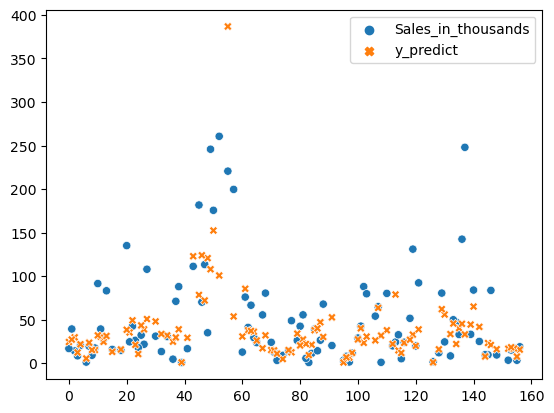

In [61]:
sns.scatterplot([train.Sales_in_thousands,train.y_predict])

***Since there is no co-relation between y_actual & y_predicted, we can say that the model is definitely not good.

### Model Validation:
* Model validation is done using DECILE analysis.
* Decile means 10, i.e. dividing the y_actual & y_predict in the 10 groups of equal sizes.
* Decile analysis on both train & test.

* **Deciles(groups) are always created on y_pedict**

### Decile Analysis

##Create deciles in both training & testing data:

In [65]:
train['Deciles'] = pd.qcut(train.y_predict,10,labels=range(1,11))

In [67]:
test['Deciles'] = pd.qcut(test.y_predict,10,labels=range(1,11))

In [68]:
train.head()

,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Buick,Manufacturer_Cadillac,Manufacturer_Chevrolet,Manufacturer_Chrysler,Manufacturer_Dodge,Manufacturer_Ford,Manufacturer_Honda,Manufacturer_Hyundai,...,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,ln_Sales_in_thousands,y_predict,Deciles
135,False,False,False,False,False,False,False,False,False,False,...,99.4,68.3,175.2,3.12500,15.9,24.0,66.762943,3.497356,40.283977,8
77,False,False,False,False,False,False,False,False,False,False,...,117.7,78.2,215.3,4.12100,19.0,21.0,93.957917,3.890002,12.625864,2
18,False,False,False,True,False,False,False,False,False,False,...,117.5,77.0,201.2,5.39668,30.0,15.0,109.509117,2.693613,15.870289,3
48,False,False,False,False,False,False,False,True,False,False,...,106.5,69.1,184.6,2.76900,15.0,25.0,67.351011,3.557289,120.727855,10
4,True,False,False,False,False,False,False,False,False,False,...,102.6,68.2,178.0,2.99800,16.4,27.0,62.777639,3.015388,21.880433,4


In [69]:
test.head()

,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Buick,Manufacturer_Cadillac,Manufacturer_Chevrolet,Manufacturer_Chrysler,Manufacturer_Dodge,Manufacturer_Ford,Manufacturer_Honda,Manufacturer_Hyundai,...,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,ln_Sales_in_thousands,y_predict,Deciles
117,False,False,False,False,False,False,False,False,False,False,...,113.3,76.3,165.4,2.850,12.0,21.0,106.984456,0.627007,3.559673,1
75,False,False,False,False,False,False,False,False,False,False,...,103.0,71.5,180.1,3.900,17.2,21.0,91.943802,3.936481,21.233927,4
51,False,False,False,False,False,False,False,True,False,False,...,114.7,78.2,212.0,3.908,19.0,21.0,80.499537,4.149511,110.380784,10
31,False,False,False,False,False,True,False,False,False,False,...,108.0,71.0,186.0,2.911,16.0,27.0,53.566200,3.475253,40.401402,7
35,False,False,False,False,False,False,True,False,False,False,...,105.0,74.4,174.4,2.567,12.5,29.0,52.084899,4.331181,51.704220,9


###Creating Decile Summary

In [70]:
train_Decile = train.groupby('Deciles')[['Sales_in_thousands','y_predict']].mean()
train_Decile

C:\Users\Pratiksha Sahu\AppData\Local\Temp\ipykernel_3908\3810123086.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_Decile = train.groupby('Deciles')[['Sales_in_thousands','y_predict']].mean()


,Sales_in_thousands,y_predict
Deciles,,
1,5.305142,5.669928
2,17.676091,13.486872
3,19.909000,17.195615
4,32.404455,22.352563
5,35.540818,26.771704
6,50.131000,31.149341
7,64.437727,35.446080
8,60.054909,41.004092
9,66.597909,54.041677


In [71]:
test_Decile = test.groupby('Deciles')[['Sales_in_thousands','y_predict']].mean()
test_Decile

C:\Users\Pratiksha Sahu\AppData\Local\Temp\ipykernel_3908\3230432297.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  test_Decile = test.groupby('Deciles')[['Sales_in_thousands','y_predict']].mean()


,Sales_in_thousands,y_predict
Deciles,,
1,5.972400,3.236573
2,15.483000,11.215669
3,23.359800,17.013178
4,26.074750,20.623478
5,55.971200,24.424186
6,52.457600,32.226491
7,70.545250,38.468676
8,97.243200,43.635469
9,43.397200,69.855992


#### Model Errors using .resid()

#### What can be the possible reasons for poor model performance?
1. Small sample 
2. Assumptions of linear/regression modelling are not true for the model in consideration

### Other assumptions of linear model: 

##### 1. Model error means = 0:

In [72]:
print(lm3.resid.mean())

3.258962926229955e-14


##### 2. Residues should not be co-related with dependent Y variable:

In [73]:
stats.stats.pearsonr(lm3.resid,train.ln_Sales_in_thousands)

C:\Users\Pratiksha Sahu\AppData\Local\Temp\ipykernel_3908\2550113745.py:1: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  stats.stats.pearsonr(lm3.resid,train.ln_Sales_in_thousands)


PearsonRResult(statistic=0.6870505365207187, pvalue=1.5999942121211754e-16)

##### 3. Heteroscedacticity:
With increase in X, y also increases, but if its shows clustured, then its not a regression problem, its a clusturing problem

### Tips/guidlines for imporvement of model accuracy

#### Possible reasons for model is not validating (over fitting)
---------------------------------------------------------------------------------------------
1. Data preparation problem (outliers, missings, variable conversions etc. not correct)
2. not included right variables
3. If the data have multicollinerity
4. Including more number of variables 
5. Data size is very low  (ideally we should have 1varaible = 100 obs)
6. The assumptions are not 100% valid
7. The variables are not explaining completely

#### How to over come this problem?
--------------------------------------------------------------------------------------------
1. Increase the data/sample size
2. Change the variables - Reiterate the model with different combinations of variables
3. Apply right transformations on X variables such the the linear relationship between Y & X will imrpvove
4. Add dervied variables which can explain Y better
5. Re look into data preparation steps
6. Look at the importance of variables include them in the model
7. Change the modelling technique

******************
There are few techniques can help you to identify important variables (Variable selection - Feature selection)
* F-Regression
* RFE (Recursive feature elimination) - Stepwise regression
******************

### 10. DATA MODELLING:
            
            i. train-test split
            ii. Define & fit the model
            iii. Model summary
            iv. Predict the y for both train & test
            v. analysing Actual y & predict y----> MSE, MAE, MAPE, RMSE 
            
### 11. Model Validation:
            Decile analysis

#### Train-Test Split:

* There are 2 methods to perform train-test split:

        1. from statsmodel:
               train , test = train_test_split(data, train = 0.7, test = 0.3, random_state = 1)
               
        2. from sklearn:
                train_test_split( x variables, y variable)
                x_train, x_test, y_train, y_test = train_test_split( features, ln_sales_in_thousand)
                        features will all x variables except Sales & ln_Sales.

In [43]:
#### 1.from statsmodels:

train, test =  train_test_split(cars_new, test_size= 0.3, train_size=0.7, random_state = 1)

In [44]:
train.head(3)

,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Buick,Manufacturer_Cadillac,Manufacturer_Chevrolet,Manufacturer_Chrysler,Manufacturer_Dodge,Manufacturer_Ford,Manufacturer_Honda,Manufacturer_Hyundai,...,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,ln_Sales_in_thousands
135,False,False,False,False,False,False,False,False,False,False,...,2.5,165.0,99.4,68.3,175.2,3.12500,15.9,24.0,66.762943,3.497356
77,False,False,False,False,False,False,False,False,False,False,...,4.6,215.0,117.7,78.2,215.3,4.12100,19.0,21.0,93.957917,3.890002
18,False,False,False,True,False,False,False,False,False,False,...,5.7,255.0,117.5,77.0,201.2,5.39668,30.0,15.0,109.509117,2.693613


In [45]:
test.head(3)

,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Buick,Manufacturer_Cadillac,Manufacturer_Chevrolet,Manufacturer_Chrysler,Manufacturer_Dodge,Manufacturer_Ford,Manufacturer_Honda,Manufacturer_Hyundai,...,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,ln_Sales_in_thousands
117,False,False,False,False,False,False,False,False,False,False,...,3.5,253.0,113.3,76.3,165.4,2.850,12.0,21.0,106.984456,0.627007
75,False,False,False,False,False,False,False,False,False,False,...,3.0,220.0,103.0,71.5,180.1,3.900,17.2,21.0,91.943802,3.936481
51,False,False,False,False,False,False,False,True,False,False,...,4.6,200.0,114.7,78.2,212.0,3.908,19.0,21.0,80.499537,4.149511


In [46]:
#### 2. From sklearn:

# cars_new.ln_Sales_in_thousands----> y

features = cars_new.columns.difference(['Sales_in_thousands', 'ln_Sales_in_thousands'])
features

Index(['Curb_weight', 'Engine_size', 'Fuel_capacity', 'Fuel_efficiency',
       'Horsepower', 'Length', 'Manufacturer_Audi', 'Manufacturer_BMW',
       'Manufacturer_Buick', 'Manufacturer_Cadillac', 'Manufacturer_Chevrolet',
       'Manufacturer_Chrysler', 'Manufacturer_Dodge', 'Manufacturer_Ford',
       'Manufacturer_Honda', 'Manufacturer_Hyundai', 'Manufacturer_Infiniti',
       'Manufacturer_Jaguar', 'Manufacturer_Jeep', 'Manufacturer_Lexus',
       'Manufacturer_Lincoln', 'Manufacturer_Mercedes_B',
       'Manufacturer_Mercury', 'Manufacturer_Mitsubishi',
       'Manufacturer_Nissan', 'Manufacturer_Oldsmobile',
       'Manufacturer_Plymouth', 'Manufacturer_Pontiac', 'Manufacturer_Porsche',
       'Manufacturer_Saab', 'Manufacturer_Saturn', 'Manufacturer_Subaru',
       'Manufacturer_Toyota', 'Manufacturer_Volkswagen', 'Manufacturer_Volvo',
       'Power_perf_factor', 'Price_in_thousands', 'Vehicle_type_Passenger',
       'Wheelbase', 'Width', 'four_year_resale_value'],
      dtype

In [47]:
x_train, x_test, y_train, y_test = train_test_split(cars_new[features], cars_new.ln_Sales_in_thousands,
                                                   test_size=0.3, random_state= 1)

In [48]:
x_train

,Curb_weight,Engine_size,Fuel_capacity,Fuel_efficiency,Horsepower,Length,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Buick,Manufacturer_Cadillac,...,Manufacturer_Subaru,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Power_perf_factor,Price_in_thousands,Vehicle_type_Passenger,Wheelbase,Width,four_year_resale_value
135,3.12500,2.5,15.9,24.0,165.0,175.2,False,False,False,False,...,True,False,False,False,66.762943,20.095,False,99.4,68.3,18.020008
77,4.12100,4.6,19.0,21.0,215.0,215.3,False,False,False,False,...,False,False,False,False,93.957917,43.330,True,117.7,78.2,21.725000
18,5.39668,5.7,30.0,15.0,255.0,201.2,False,False,False,True,...,False,False,False,False,109.509117,46.225,False,117.5,77.0,18.020008
48,2.76900,2.5,15.0,25.0,170.0,184.6,False,False,False,False,...,False,False,False,False,67.351011,17.035,True,106.5,69.1,8.835000
4,2.99800,1.8,16.4,27.0,150.0,178.0,True,False,False,False,...,False,False,False,False,62.777639,23.990,True,102.6,68.2,22.255000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,2.91000,2.2,13.1,28.0,137.0,190.4,False,False,False,False,...,False,False,False,False,54.819728,15.010,True,106.5,69.0,18.020008
137,2.99800,2.2,18.5,27.0,133.0,188.5,False,False,False,False,...,False,True,False,False,54.372420,17.518,True,105.2,70.1,13.245000
72,3.69300,4.0,19.8,21.0,300.0,189.2,False,False,False,False,...,False,False,False,False,125.013357,46.305,True,110.2,70.9,18.020008
140,2.58000,2.4,15.1,23.0,142.0,178.7,False,False,False,False,...,False,True,False,False,55.297117,11.528,False,103.3,66.5,9.575000


### Building the model:

##### a. Define the model: 
         
         Model is always defined on training data.
         
        smf.ols(formula = , data = train)
                where formula is  y ~ x1+ x2+ x3

In [43]:
features  # x variables

Index(['Curb_weight', 'Engine_size', 'Fuel_capacity', 'Fuel_efficiency',
       'Horsepower', 'Length', 'Manufacturer_Audi', 'Manufacturer_BMW',
       'Manufacturer_Buick', 'Manufacturer_Cadillac', 'Manufacturer_Chevrolet',
       'Manufacturer_Chrysler', 'Manufacturer_Dodge', 'Manufacturer_Ford',
       'Manufacturer_Honda', 'Manufacturer_Hyundai', 'Manufacturer_Infiniti',
       'Manufacturer_Jaguar', 'Manufacturer_Jeep', 'Manufacturer_Lexus',
       'Manufacturer_Lincoln', 'Manufacturer_Mercedes_B',
       'Manufacturer_Mercury', 'Manufacturer_Mitsubishi',
       'Manufacturer_Nissan', 'Manufacturer_Oldsmobile',
       'Manufacturer_Plymouth', 'Manufacturer_Pontiac', 'Manufacturer_Porsche',
       'Manufacturer_Saab', 'Manufacturer_Saturn', 'Manufacturer_Subaru',
       'Manufacturer_Toyota', 'Manufacturer_Volkswagen', 'Manufacturer_Volvo',
       'Power_perf_factor', 'Price_in_thousands', 'Vehicle_type_Passenger',
       'Wheelbase', 'Width', 'four_year_resale_value'],
      dtype

In [44]:
' + '.join(features)   # x1 + x2 +......

'Curb_weight + Engine_size + Fuel_capacity + Fuel_efficiency + Horsepower + Length + Manufacturer_Audi + Manufacturer_BMW + Manufacturer_Buick + Manufacturer_Cadillac + Manufacturer_Chevrolet + Manufacturer_Chrysler + Manufacturer_Dodge + Manufacturer_Ford + Manufacturer_Honda + Manufacturer_Hyundai + Manufacturer_Infiniti + Manufacturer_Jaguar + Manufacturer_Jeep + Manufacturer_Lexus + Manufacturer_Lincoln + Manufacturer_Mercedes_B + Manufacturer_Mercury + Manufacturer_Mitsubishi + Manufacturer_Nissan + Manufacturer_Oldsmobile + Manufacturer_Plymouth + Manufacturer_Pontiac + Manufacturer_Porsche + Manufacturer_Saab + Manufacturer_Saturn + Manufacturer_Subaru + Manufacturer_Toyota + Manufacturer_Volkswagen + Manufacturer_Volvo + Power_perf_factor + Price_in_thousands + Vehicle_type_Passenger + Wheelbase + Width + four_year_resale_value'

#### Model 0: without removing any variables

In [46]:
##### 1. Define the model 0:

formula_m0 =  'ln_Sales_in_thousands ~ ' + ' + '.join(features)
formula_m0

'ln_Sales_in_thousands ~ Curb_weight + Engine_size + Fuel_capacity + Fuel_efficiency + Horsepower + Length + Manufacturer_Audi + Manufacturer_BMW + Manufacturer_Buick + Manufacturer_Cadillac + Manufacturer_Chevrolet + Manufacturer_Chrysler + Manufacturer_Dodge + Manufacturer_Ford + Manufacturer_Honda + Manufacturer_Hyundai + Manufacturer_Infiniti + Manufacturer_Jaguar + Manufacturer_Jeep + Manufacturer_Lexus + Manufacturer_Lincoln + Manufacturer_Mercedes_B + Manufacturer_Mercury + Manufacturer_Mitsubishi + Manufacturer_Nissan + Manufacturer_Oldsmobile + Manufacturer_Plymouth + Manufacturer_Pontiac + Manufacturer_Porsche + Manufacturer_Saab + Manufacturer_Saturn + Manufacturer_Subaru + Manufacturer_Toyota + Manufacturer_Volkswagen + Manufacturer_Volvo + Power_perf_factor + Price_in_thousands + Vehicle_type_Passenger + Wheelbase + Width + four_year_resale_value'

In [47]:
#### 2. Defining the model 0:

lm0 = smf.ols( formula= formula_m0, data =  train)

In [48]:
#### 3. Fit the model 0: 
        # it will generate all the slope line at the backend & the best fit line will be selected.
    
lm0 = lm0.fit()

In [49]:
##### 4. Model0 Summary:
        # .summary()
    
print( lm0.summary() )

                              OLS Regression Results                             
Dep. Variable:     ln_Sales_in_thousands   R-squared:                       0.700
Model:                               OLS   Adj. R-squared:                  0.523
Method:                    Least Squares   F-statistic:                     3.962
Date:                   Mon, 21 Oct 2024   Prob (F-statistic):           3.00e-07
Time:                           08:16:05   Log-Likelihood:                -112.66
No. Observations:                    109   AIC:                             307.3
Df Residuals:                         68   BIC:                             417.7
Df Model:                             40                                         
Covariance Type:               nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

In [50]:
###As by seeing summary the p_values of the features is more than 0.05 & if not 0.1. So, we need to do variable reduction.